In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lsing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lsing\AppData\Roaming\nltk_data...


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
# task 1 - loading
data = pd.read_json('recipes.json', lines=True)

In [3]:
data.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


In [5]:
data['Ingredients'].head(5)

0    [2 tbsp olive oil, knob butter, 1 onion, finel...
1    [175g butter, chopped, 200g dark muscovado sug...
2    [200g dark muscovado sugar, 175g butter, chopp...
3    [500g strong white flour, plus extra for dusti...
4    [280g self-raising flour, 175g golden caster s...
Name: Ingredients, dtype: object

In [6]:
# task 2 - cleaning
data['Ingredients']=data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z]',' ', str(x)))

In [7]:
data = data.dropna(subset=['Ingredients'])

In [8]:
stop = stopwords.words('english') + ['tsp','tbsp','finely','extra','chopped']
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# task 3 - remove encoding
def remove_encoding_word(word):
    word=str(word)
    word=word.encode('ASCII','ignore').decode('ASCII')
    return word


In [10]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [11]:
# task 4 - define lemmatizing
data['Ingredients']=data['Ingredients'].apply(remove_encoding_text)

In [12]:
text=" ".join(words for words in data['Ingredients'])
len(text)

334272

In [13]:
lemma= WordNetLemmatizer().lemmatize

In [14]:
lemma('leaves')

'leaf'

In [15]:
# task 5 - fit and transform text, with or without lemmatizing
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w)>3 and w.isalpha()]
    return tokens

In [16]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = (2,2), stop_words = stop, strip_accents='unicode')

In [17]:
tdm=vectorizer.fit_transform(data['Ingredients'])

C:\Users\LalitDumka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\LalitDumka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [18]:
vectorizer.vocabulary_.items()

dict_items([('olive knob', 9699), ('knob butter', 7502), ('butter onion', 1627), ('onion sausagemeat', 9857), ('sausagemeat skinned', 13214), ('skinned sausage', 13992), ('sausage grated', 13191), ('grated zest', 6345), ('zest lemon', 17881), ('lemon fresh', 8023), ('fresh white', 5613), ('white breadcrumb', 17437), ('breadcrumb ready', 1295), ('ready dried', 12199), ('dried apricot', 4588), ('apricot chestnut', 290), ('chestnut canned', 2277), ('canned vacuum', 1859), ('vacuum packed', 16845), ('packed fresh', 10288), ('fresh dried', 5558), ('dried thyme', 4655), ('thyme cranberry', 16185), ('cranberry fresh', 3531), ('fresh frozen', 5563), ('frozen boneless', 5651), ('boneless skinless', 1056), ('skinless chicken', 13970), ('chicken breast', 2317), ('breast pack', 1336), ('pack ready', 10250), ('ready made', 12209), ('made shortcrust', 8524), ('shortcrust pastry', 13744), ('pastry beaten', 10590), ('beaten glaze', 689), ('butter dark', 1572), ('dark muscovado', 4150), ('muscovado sug

In [19]:
# task 6 -  get word frequencies and create wordcloud
tfidf_weights=[(word,tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [26]:
tfidf_weights=dict(tfidf_weights)

In [27]:
w=WordCloud(width=1500,height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

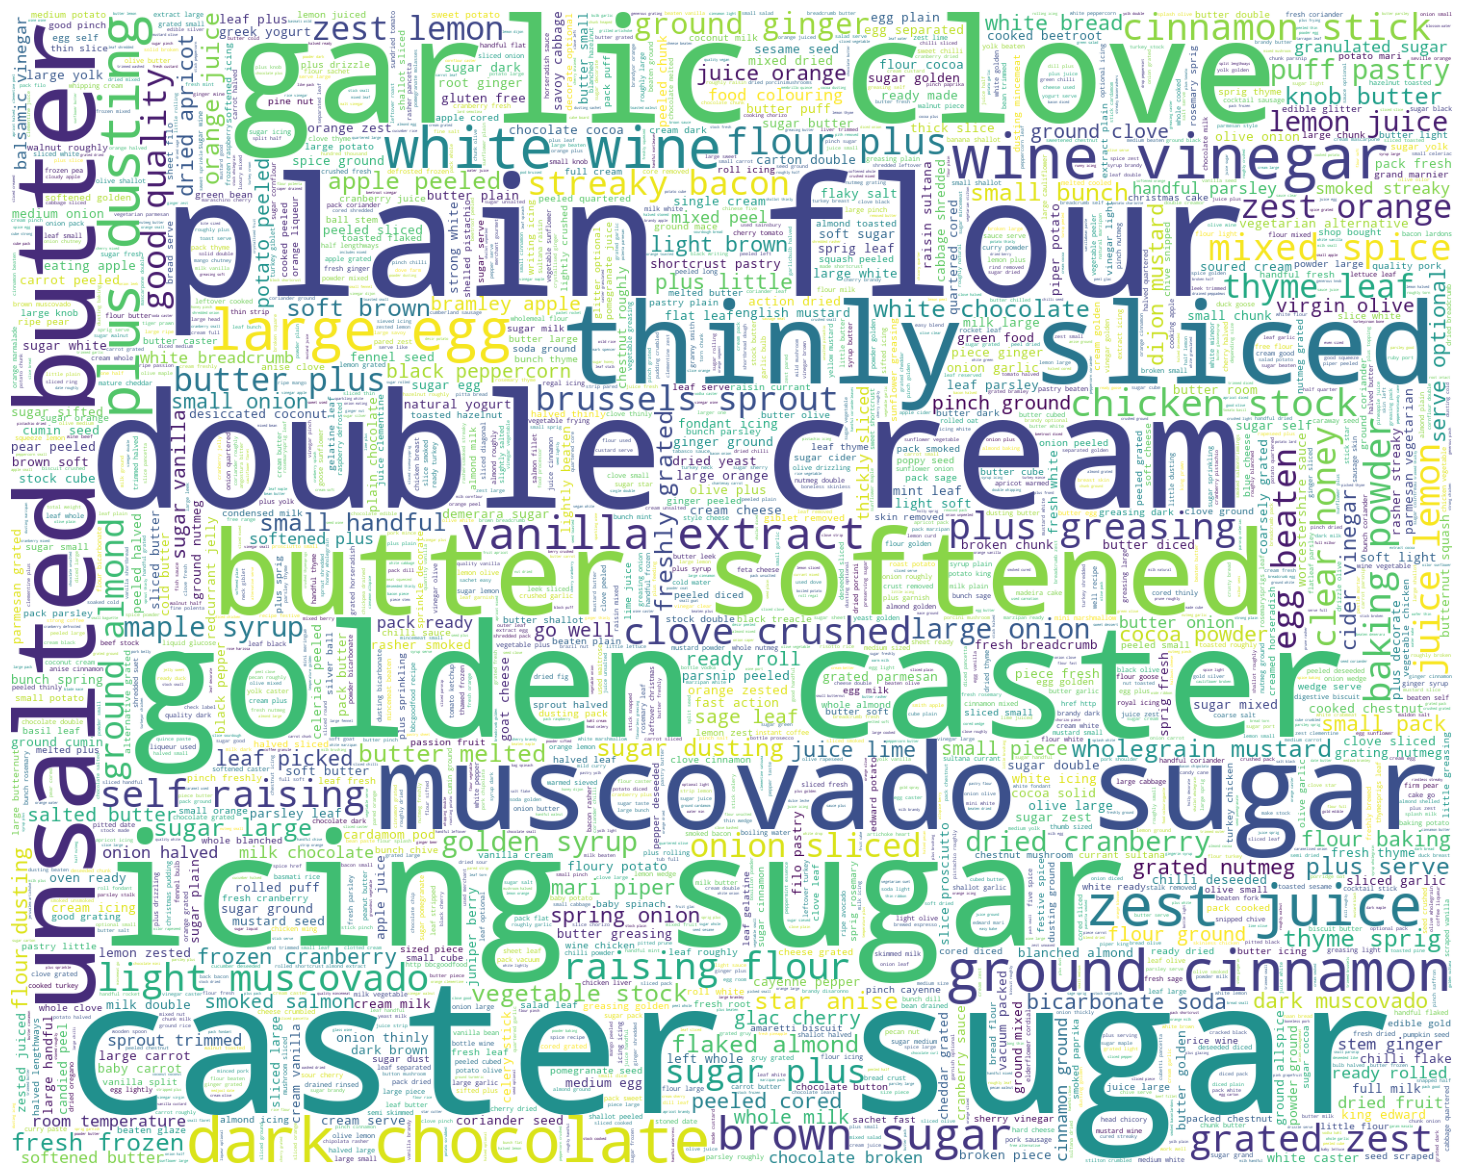

In [32]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')
txtFile = open("output.txt","w")
sortedWeights = sorted(tfidf_weights.items(), key=lambda x:x[1],reverse=True)
txtFile.write("Ingredient      :        Weight \n")
for key,values in sortedWeights:
    txtFile.write(str(key)+" : " +str(values) + "\n")
txtFile.close()
